[Base de dados][1]

[1]: <https://www.cryptodatadownload.com/data/binance/>

<div style="text-align: justify"> 
<strong>Potifólio</strong> (ou carteira de investimento), no mundo do mercado financeiro, é o conjunto de investimentos em que é alocado um montante (ou ativos) do capital do investidor de modo que a cada investimento é alocada uma fração desse montante, de acordo com preferências e estratégias do investidor.
Quando falamos sobre "Otimização de Portifólios", estamos em busca de estratégias para selecionarmos a melhor distribuição dos ativos em uma carteira a fim de atingirmos um objetivo comum. Objetivo esse que pode variar de acordo com o perfil de cada tipo de investidor, pode ser que para um seja preferível maximizar o retorno esperado de seu portfóli,o mesmo com alto risco, enquanto, para outro, o objetivo seria investir em uma carteira com o menor risco possível, por exemplo.
A seguir serão discutidos esses conceitos e modos de otimização de portfólios utilizando a chamada <strong>Teoria Moderna do Portfólio</strong>, do laureado <strong>Harry Markowitz</strong> com o prêmio Nobel de Economia. 
    
<h3>1. Introdução</h3>
A essência da Teoria Moderna do Portfólio está ligada ao trade off existente entre o <strong>retorno</strong> e <strong>risco</strong>. Segundo Markowitz, os investidores seriam avessos ao risco, e, por isso, só estariam dispostos a aumentar o risco caso isso torne possível alcançar um retorno esperado mais alto.</div>

<div>Então a pergunta a ser respondida é: </div>
<div>"Considerando um certo nível de risco, de qual carteira séra obtida o maior retorno?".
Para isso, vamos antes entender melhor como calcular o <strong>retorno</strong> e <strong>risco</strong> de um portfólio.</div>



<h3>2. Retorno</h3>
<div style="text-align: justify"> Para calcularmos os retornos simples dos nossos ativos em python, podemos utilizar a função pct_change() da biblioteca pandas. Aqui, para exemplificar o nosso portfólio, utilizaremos uma carteira composta por pelos seguintes criptoativos:</div>
"ADA", "BNB", "BTC", "BTT", "DASH", "EOS", "ETC", "ETH", "LINK", "LTC" cotados na base da stablecoin USDT.

In [1]:
# Importando as bibliotecas 
import pandas as pd 
import numpy as np

In [2]:
from matplotlib import interactive

In [3]:
import matplotlib.pyplot as plt

In [4]:
from pandas_datareader import data

<h4>2.1. Montando o nossa carteira com preços de fechamento "ADA", "BNB", "BTC", "BTT", "DASH", "EOS", "ETC", "ETH", "LINK", "LTC"</h4>

#### Lista de criptoativo cotados na base da stablecoin [USD Tether (Dólar Tether ou USDT))][1]
##### *Por ser uma stablecoin para cada 1 USDT criado, a empresa gestora da Tether USDT precisa ter US$ 1 em suas reservas bancárias, garantindo que há os recursos necessários para os investidores da moeda.
[1]: <https://coinext.com.br/o-que-e-tether-usdt>

In [5]:
cryptos = 10
ls_first_crypto = ["ADA", "BNB", "BTC", "BTT", "DASH", "EOS", "ETC", "ETH", "LINK", "LTC"][:cryptos]
# ls_first_crypto = ["BNB", "BTC", "ETH", "LTC"][:cryptos]

len(ls_first_crypto)

10

#### É composto um dataframe **result** com os valores de fechamento de cada criptoativo.

In [6]:
frames = []
dataframes_names = []
for i, first_crypto in enumerate(ls_first_crypto):
    second_crypto = "USDT"
    par = """\\
def f():
    df_{0}{1} = pd.read_csv("Binance_{0}{1}_d.csv", low_memory=False)
    columns{0}{1} = list(df_{0}{1}.index[0])
    df_{0}{1} = pd.read_csv("Binance_{0}{1}_d.csv", names=columns{0}{1}, low_memory=False)
    df_{0}{1} = df_{0}{1}[['date', 'close']]
    return df_{0}{1}""".format(first_crypto, second_crypto)
    exec(par)
    frames += [f()]
    dataframes_names += [first_crypto]
    if len(frames) > 1:
        if len(frames) == 2:
            result = pd.merge(frames[0], frames[1], on="date", suffixes=("_" + dataframes_names[0], "_" + dataframes_names[1]))
        else:
            result = pd.merge(result, frames[i], on="date")
            result = result.rename(columns = {'close': 'close_' + dataframes_names[i]})

In [7]:
df = result
df.index = df["date"]
df = df.drop(columns = ["date"])

In [8]:
df = df[2:].dropna()
for column in df.columns:
    df[column] = pd.to_numeric(df[column], downcast="float")

In [9]:
df = df.sort_index(ascending=True)

In [10]:
df

,close_ADA,close_BNB,close_BTC,close_BTT,close_DASH,close_EOS,close_ETC,close_ETH,close_LINK,close_LTC
date,,,,,,,,,,
2019-03-28 00:00:00,0.06551,16.666500,4027.810059,0.000767,95.739998,4.2442,4.705500,137.860001,0.499200,60.500000
2019-03-29 00:00:00,0.07112,16.475300,4103.250000,0.000764,98.129997,4.3020,4.872200,143.250000,0.500800,61.450001
2019-03-30 00:00:00,0.07210,16.966600,4106.970215,0.000761,100.779999,4.1502,4.784300,142.460007,0.494000,60.450001
2019-03-31 00:00:00,0.06989,17.537600,4103.950195,0.000763,110.699997,4.1893,4.824500,141.380005,0.508400,60.480000
2019-04-01 00:00:00,0.07210,17.888800,4144.560059,0.000753,112.970001,4.2043,4.809500,141.240005,0.554000,60.450001
...,...,...,...,...,...,...,...,...,...,...
2021-04-14 00:00:00,1.45092,550.018188,62959.531250,0.007639,305.359985,7.6652,21.919300,2432.600098,41.364101,278.859985
2021-04-15 00:00:00,1.47820,541.882385,63159.980469,0.008225,326.799988,7.8873,28.612900,2514.040039,42.560101,285.630005
2021-04-16 00:00:00,1.40989,508.274292,61334.800781,0.007713,378.470001,8.4974,38.273399,2422.669922,41.986099,308.429993


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 753 entries, 2019-03-28 00:00:00 to 2021-04-18 00:00:00
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   close_ADA   753 non-null    float32
 1   close_BNB   753 non-null    float32
 2   close_BTC   753 non-null    float32
 3   close_BTT   753 non-null    float32
 4   close_DASH  753 non-null    float32
 5   close_EOS   753 non-null    float32
 6   close_ETC   753 non-null    float32
 7   close_ETH   753 non-null    float32
 8   close_LINK  753 non-null    float32
 9   close_LTC   753 non-null    float32
dtypes: float32(10)
memory usage: 35.3+ KB


<h4>2.2. Retorno simples dos ativos</h4>

In [12]:
df.pct_change().head()

,close_ADA,close_BNB,close_BTC,close_BTT,close_DASH,close_EOS,close_ETC,close_ETH,close_LINK,close_LTC
date,,,,,,,,,,
2019-03-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-29 00:00:00,0.085636,-0.011472,0.018730,-0.003911,0.024963,0.013619,0.035427,0.039098,0.003205,0.015702
2019-03-30 00:00:00,0.013780,0.029820,0.000907,-0.004580,0.027005,-0.035286,-0.018041,-0.005515,-0.013578,-0.016273
2019-03-31 00:00:00,-0.030652,0.033654,-0.000735,0.003287,0.098432,0.009421,0.008403,-0.007581,0.029150,0.000496
2019-04-01 00:00:00,0.031621,0.020026,0.009895,-0.013366,0.020506,0.003581,-0.003109,-0.000990,0.089693,-0.000496


<h4>2.3. vetor de pesos w</h4>

Precisamos calcular o retorno do portfólio como um todo. Para isso, distribui-se a porcentagem que cada ativo receberá na nossa carteira criando um vetor de pesos w e multiplicando-o pelos retornos simples dos ativos:

In [13]:
r = df.pct_change() # retorno do portfólio
w = [0.1, 0.1, 0.2, 0.2, 0.05, 0.05, 0.1, 0.1, 0.2, 0.2][:cryptos] # pesos de cada ativo na ordem dos nomes das colunas do dataframe de retorno r (ou df.pct_change())
R = np.dot(r, w) # retorno do portfólio, poderado pelo vetor de pesos w

<div style="text-align: justify"> <h3>3. Risco vol (de volatividade)</h3>
Existem várias formas diferentes para se calcular o risco do investimento, mas no geral, essas métricas estarão relacionadas a quão volátil é um ativo. Ativos muitos voláteis, ou seja, que variam muito, não são muito seguros. Assim, a forma mais comum de se obter esse tipo de métrica para uma ação é através do cálculo de seu desvio padrão:</div>

In [14]:
vol = df.std()
vol

close_ADA         0.317853
close_BNB        85.283394
close_BTC     14173.925781
close_BTT         0.001317
close_DASH       53.354725
close_EOS         1.302159
close_ETC         3.428181
close_ETH       517.934998
close_LINK        8.999140
close_LTC        50.566128
dtype: float32

<div style="text-align: justify">Intuitivamente, poderíamos pensar que para calcular o risco de uma carteira, bastaria multiplicar o risco de cada uma de suas ações pelo vetor de pesos de seu portfólio, mas segundo Markowitz, em um portfólio, o seu risco não será igual à média do risco de cada um de seus ativos, pois deve se levar em conta como todas as ações estão se movimentando em conjunto. Para refletir esse aspecto, precisamos antes calcular a matriz de covariância das médias dos retornos:</div>

In [15]:
# retorno simples 
r = df.pct_change()

# média dos retornos anualizados 
mean_returns = r.mean() * 252
mean_returns

close_ADA     1.460559
close_BNB     1.587229
close_BTC     1.096660
close_BTT     1.448324
close_DASH    0.898251
close_EOS     0.590921
close_ETC     1.110339
close_ETH     1.258679
close_LINK    2.083292
close_LTC     0.891153
dtype: float32

In [16]:
# matriz de covariância 
covariance = np.cov(r[1:].T)
covariance

array([[0.00351088, 0.0018999 , 0.00148126, 0.00186568, 0.0018691 ,
        0.00220349, 0.00199299, 0.00216146, 0.00218194, 0.00209433],
       [0.0018999 , 0.0036148 , 0.00141996, 0.00211684, 0.00188866,
        0.00191027, 0.00170539, 0.00179224, 0.00186855, 0.00182243],
       [0.00148126, 0.00141996, 0.0016289 , 0.00162647, 0.00145216,
        0.00155507, 0.00139141, 0.00161178, 0.00138292, 0.00163453],
       [0.00186568, 0.00211684, 0.00162647, 0.00574627, 0.00201733,
        0.00222656, 0.00186971, 0.00197635, 0.00208942, 0.00192865],
       [0.0018691 , 0.00188866, 0.00145216, 0.00201733, 0.00384855,
        0.00221528, 0.0025084 , 0.00188192, 0.00192004, 0.00209331],
       [0.00220349, 0.00191027, 0.00155507, 0.00222656, 0.00221528,
        0.00297943, 0.00230439, 0.0021085 , 0.00214727, 0.00231068],
       [0.00199299, 0.00170539, 0.00139141, 0.00186971, 0.0025084 ,
        0.00230439, 0.00326517, 0.00193844, 0.0018496 , 0.00216066],
       [0.00216146, 0.00179224, 0.0016117

Tendo calculado a matriz de covariância ( C ), e com os nossos vetores de pesos (w), em seguida, vamos utilizar esta fórmula para calcular o risco do portfólio:

In [17]:
w = pd.DataFrame(w)
w

,0
0,0.10
1,0.10
2,0.20
3,0.20
4,0.05
5,0.05
6,0.10
7,0.10
8,0.20
9,0.20


Risco do portfólio anualizado

In [18]:
vol = np.sqrt(np.dot(w.T, np.dot(covariance, w))) * np.sqrt(252)
vol

array([[0.94147064]])

<div style="text-align: justify"> <h3>3. Sharpe Ratio</h3>
Todo investimento possui uma certa taxa de risco associada a ele, mas é certo que alguns investimentos são mais seguros do que outros, certo?
O Sharpe Ratio é uma métrica utilizada para nos ajudar a analisar se estamos sendo devidamente recompensados por uma taxa adicional de risco assumido. Para isso, ele <strong>compara o retorno de um investimento que possui um risco associado com um outro de "risco livre"</strong>. No caso de uma carteira de ações na bolsa brasileira, ele poderia comparar o retorno dela com um o retorno de um investimento em renda fixa, por exemplo.
Para calcular o sharpe ratio subtraimos o taxa de risco livre do retorno do portfólio e dividimos esse valor pelo risco do portfólio:</div>
<center><img src="shape_ratio.png"/></center>

Quanto maior for o valor do Sharpe Ratio, mais atraente será esse investimento dado o risco associado. Porém, um valor negativo significa que a taxa livre de risco é maior que o retorno do portfólio. De maneira geral, um sharpe ratio maior que 1 é considerado bom.

### Simulando Portfólios
Agora que já entendemos como calcular o retorno e o risco de um portfólio, vamos simular várias carteiras com pesos diferentes e observar qual delas irá nos retornar o portfólio com o maior Sharpe Ratio.

In [19]:
def generate_wallets(df_close, num_portfolios = 1000000, risk_free = 0):
    # vetores de dados
    portfolio_weights = []
    portfolio_exp_returns = []
    portfolio_vol = []
    portfolio_sharpe = []

    # retorno simples 
    r = df.pct_change()
    mean_returns = r.mean() * 252

    # matriz de covariância 
    covariance = np.cov(r[1:].T)

    for i in range(num_portfolios):
        # gerando pesos aleatórios
        k = np.random.rand(len(df.columns))
        w = k / sum (k)

        # retorno
        R = np.dot(mean_returns, w)

        # risco
        vol = np.sqrt(np.dot(w.T, np.dot(covariance, w))) * np.sqrt(252)

        # sharpe ratio
        sharpe = (R - risk_free)/vol

        portfolio_weights.append(w)
        portfolio_exp_returns.append(R)
        portfolio_vol.append(vol)
        portfolio_sharpe.append(sharpe)

    wallets = {'weights': portfolio_weights,
              'returns': portfolio_exp_returns,
              'vol':portfolio_vol,
              'sharpe': portfolio_sharpe}

    return wallets

### Para descobrirmos qual carteira obteve o melhor Sharpe Ratio, utilizamos a seguinte função:

In [20]:
def best_portfolio(wallets):
    sharpe = wallets['sharpe']
    weights = wallets['weights']
    
    indice = np.array(sharpe).argmax()
        
    return weights[indice]

#### Fazendo uma simulação com as funções que descrevemos acima, a carteira que nos retornaria o maior Sharpe Ratio seria a com a seguinte distribuição de pesos:

In [21]:
wallets = generate_wallets(df)

In [22]:
best_portfolio(wallets)

array([0.02575853, 0.31596562, 0.21870363, 0.07537018, 0.00370873,
       0.01744515, 0.03225027, 0.00837854, 0.26770646, 0.03471289])

### A Fronteira Eficiente
Se pegarmos todos os portfólios que foram gerados e plotarmos em um gráfico, tendo como referência os __retornos no eixo y, e os riscos no eixo x,__ temos um esquema que é conhecido como a "Fronteira Eficiente". 

In [23]:
def plot_efficient_frontier(wallets):
    vol = wallets['vol']
    returns = wallets['returns']
    sharpe = wallets['sharpe']

    indice = np.array(sharpe).argmax()
    y_axis = returns[indice]
    X_axis = vol[indice]

    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.title("Efficient Frontier")
    plt.xlabel("Volatility")
    plt.ylabel("Expected return")
    plt.show()

### A Fronteira Eficiente

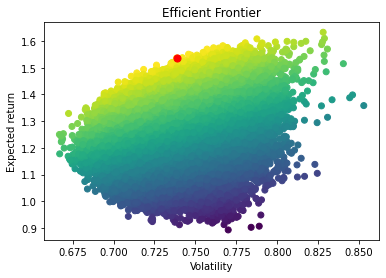

In [24]:
plot_efficient_frontier(wallets)

__O que é um bom portfólio?__

Mas afinal, o que é a fronteira eficiente?
A fronteira eficiente nada mais é do que a linha que representa os retornos máximos que podemos obter com um portfólio dado um certo nível de risco. Portfólios ótimos sempre devem estar na linha da fronteira, pois, para qualquer portfólio abaixo da linha, há uma carteira disponível com o mesmo risco associado, porém com um retorno maior. Qualquer portfólio acima da fronteira é impossível.

### Afinal, o que é um bom portfólio?

Para calcular o nosso melhor portfólio, utilizamos como métrica o maior Sharpe Ratio, porém, analisando o que acabamos de ver sobre a fronteira eficiente, você pode estar se perguntando o que constituiria um bom portfólio no final das contas, e a resposta é: depende!
Um bom portfólio vai depender do tipo de investidor e o que ele espera ganhar com os seus investimentos. Para uma pessoa que está próxima da aposentadoria, talvez seja preferível um portfólio que oferece um risco menor, já para uma pessoa mais jovem, talvez aumentar seus retornos com um portfólio um pouco mais arriscado seja uma opção mais atraente.
Independente do nível de risco que o investidor estará disponível a aceitar, o importante é estar na linha da fronteira.
Tendo isso em mente, podemos __modificar o nosso código para adicionar métodos para retornar a carteira com o menor risco e o maior retorno:__

In [25]:
def best_portfolio(wallets, method = 'sharpe_ratio'):
    vol = wallets['vol']
    sharpe = wallets['sharpe']
    weights = wallets['weights']
    returns = wallets['returns']
    
    if method == 'sharpe_ratio':

        indice = np.array(sharpe).argmax()

    elif method == 'volatility':

        indice = np.array(vol).argmin()

    elif method == 'return':

        indice = np.array(returns).argmax()

    return weights[indice]

In [26]:
def plot_efficient_frontier(wallets, method = 'sharpe_ratio'):
    vol = wallets['vol']
    returns = wallets['returns']
    sharpe = wallets['sharpe']

    if method == 'sharpe_ratio':

        indice = np.array(sharpe).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]

    elif method == 'volatility':

        indice = np.array(vol).argmin()
        y_axis = returns[indice]
        X_axis = vol[indice]

    elif method == 'return': 

        indice = np.array(returns).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]

    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.title("Efficient Frontier")
    plt.xlabel("Volatility")
    plt.ylabel("Expected return")
    plt.show()

In [27]:
wallets = generate_wallets(df)

In [28]:
best_portfolio(wallets, method = 'sharpe_ratio')

array([0.14070001, 0.2782176 , 0.14181263, 0.02639622, 0.06080759,
       0.00426224, 0.02163049, 0.05190983, 0.27295254, 0.00131085])

In [29]:
for i in range(len(ls_first_crypto)):
    print(ls_first_crypto[i], str(round(best_portfolio(wallets, method = 'sharpe_ratio')[i]*100,4)) + " %")

ADA 14.07 %
BNB 27.8218 %
BTC 14.1813 %
BTT 2.6396 %
DASH 6.0808 %
EOS 0.4262 %
ETC 2.163 %
ETH 5.191 %
LINK 27.2953 %
LTC 0.1311 %


### Risco Moderado

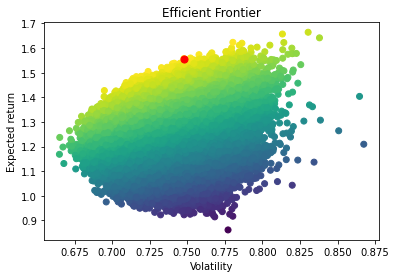

In [30]:
plot_efficient_frontier(wallets, method = 'sharpe_ratio')

In [31]:
best_portfolio(wallets, method = 'volatility')

array([0.03107954, 0.08948962, 0.41532872, 0.02987661, 0.08155496,
       0.06680875, 0.07072416, 0.12526229, 0.04486514, 0.04501021])

In [32]:
for i in range(len(ls_first_crypto)):
    print(ls_first_crypto[i], str(round(best_portfolio(wallets, method = 'volatility')[i]*100, 4)) + " %")

ADA 3.108 %
BNB 8.949 %
BTC 41.5329 %
BTT 2.9877 %
DASH 8.1555 %
EOS 6.6809 %
ETC 7.0724 %
ETH 12.5262 %
LINK 4.4865 %
LTC 4.501 %


### Baixo Risco com retorno mais baixo

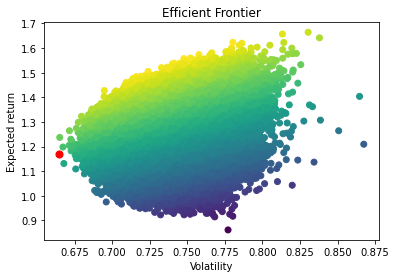

In [33]:
plot_efficient_frontier(wallets, method = 'volatility')

In [34]:
best_portfolio(wallets, method = 'return')

array([0.01542503, 0.1772935 , 0.03157174, 0.1575998 , 0.03423719,
       0.03066572, 0.01780716, 0.01066578, 0.45943562, 0.06529847])

In [35]:
for i in range(len(ls_first_crypto)):
    print(ls_first_crypto[i], str(round(best_portfolio(wallets, method = 'return')[i]*100, 4)) + " %")

ADA 1.5425 %
BNB 17.7293 %
BTC 3.1572 %
BTT 15.76 %
DASH 3.4237 %
EOS 3.0666 %
ETC 1.7807 %
ETH 1.0666 %
LINK 45.9436 %
LTC 6.5298 %


### Maior risco com chances de retornos maiores

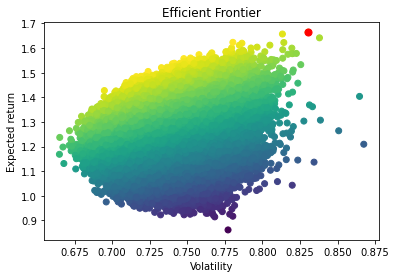

In [36]:
plot_efficient_frontier(wallets, method = 'return')